# ICHIMOKU BACKTESTING PROJECT

This project aims to learn how to apply the Ichimoku trading strategy on cryptocurrencies (i.e. Bitcoin or Ethereum) for backtesting technical analysis in order to improve the accuracy of forecast price movements by using Python.

__Note: The author is not liable for any concerns regarding the reader's decisions on personal financial strategies. This project was only made to gain new knowledge.__

For the ones reading this *_file as a PDF or on GitHub_*: the reader may use the following link if he/she wants to interact with the graphs or fails to see the intended graphs:
https://nbviewer.jupyter.org/github/dagzk/Ichimoku_Backtest/tree/main/

#### Written By Daghan 'Dan' Kendirli, Simurgh SA on December 20th 2020.

### What This Notebook Shows:

- How to get financial data without credentials
- Simple cryptocurrency analysis
- Explanation and use of Ichimoku for backtesting strategy

## Introduction:

The goal of this project is to get a sense of how to easily get financial data, get a good sense of what the Ichimoku strategy is about and how to apply it using Python. I hope the reader gains some insights about the topic. Below, I put three cryptocurrency related news links the reader can look into by clicking on them.

- [Cryptocurrency News](https://www.coindesk.com/)

- [Cryptocurrency Market Caps](https://coinmarketcap.com/coins/)

- [Binance Trading Charts](https://www.binance.com/en/trade/BTC_USDT)

There are other ways of performing backtesting on Python, i.e. multiple open-source libraries frequently used for applying backtesting strategies such as PyAlgoTrade, Backtrader, Pybacktest or even other ways of getting financial data, i.e. the Binance API should the reader want to explore different options (Here is a good video with its GitHub repository in the description to get started with: [Binance API tutorial](https://www.youtube.com/watch?v=RHqEPNgpbzQ&list=WL&index=3&t=74s). If the reader doesn't want to bother coding, they can use several websites where those functions are automatically provided (i.e. [Dukascopy](https://www.dukascopy.com/swiss/english/marketwatch/charts/.)). I've opted for Yahoo Finance to download data as there is no need to set up credentials. Note that the Binance API has more data options regarding cryptocurrencies. There are many people achieving projects and papers showing how to automate their trades, by using fancy Machine Learning models or performing a sentiment analysis (i.e. [Python for Trading YouTube Channel](https://www.youtube.com/channel/UCFGPA5ZV9BZIhR7w8EbS-hg/videos) and A LOT of other channels or resources). In my opinion though, these projects barely perform *__and__* if they performed well, they wouldn't be <u>public</u> in the first place). Using A.I. or Machine Learning is useless to perform in the field of risks, there is just too many factors (fat-tail distribution of events and the Law of Large Numbers for one) and human experience is needed.  __Again, this notebook aims to learn about the Ichimoku strategy and how to apply it to cryptocurrencies with Python, it does NOT aim at telling people what to do with their money__. 

It is very important to remember *_one thing_* before starting:

__ALL BACKTESTS ARE WRONG, SOME MIGHT BE USEFUL. HOWEVER, SOME ARE VERY HARMFUL.__

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import os
from time import sleep

# Import finance libraries
import yfinance as yf
from yahoofinancials import YahooFinancials

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import plotly
import plotly.plotly as py
from plotly import graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

//anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# Download BTC/USD Daily Data
df = yf.download('BTC-USD', period='max', progress=False)
df.reset_index(drop=False, inplace=True)
df.tail()

# Note the interval is 1 day here and can be included as interval='1d'

# Or use manually downloaded CSV file attached
# df = pd.read_csv('BTC-USD.csv')
# df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2021-04-30,53568.664062,57900.718750,53129.601562,57750.175781,57750.175781,52395931985
2414,2021-05-01,57714.664062,58448.339844,57052.273438,57828.050781,57828.050781,42836427360
2415,2021-05-02,57825.863281,57902.593750,56141.906250,56631.078125,56631.078125,38177405335
2416,2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,57200.292969,51713139031
2417,2021-05-04,57045.343750,57045.343750,55132.179688,56024.437500,56024.437500,58313764864


In [3]:
# Get BTC info (might take time to run hence commented out)
BTC_info = yf.Ticker("BTC-USD")
# BTC_info.info
# BTC_info.major_holders
# etc...
# See https://github.com/ranaroussi/yfinance for useful extra commands

In [4]:
# If you want to use Binance API, consult link below: 
# https://python-binance.readthedocs.io/en/latest/overview.html#installation

#from binance.client import Client
#from binance.client import Client

# Binance Log In (If wanting to use it to trade)
# Need to create API key by using your own account

# api_key = "your api key from binance"
# api_secret = "your api secret from binance"

# client = Client(api_key, api_secret)

# If you want to use the backtrader open library:
#import backtrader as bt
#import backtrader.feeds as btfeeds

In [5]:
# Plot User Interactive Bitcoin/USD Daily Data
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.layout.update(
    title='Interactive Bitcoin/USD Daily Chart',
    yaxis_title='Bitcoin/USD Price ($)',
    shapes = [dict(
        x0='2017-12-09', x1='2017-12-09', y0=0, y1=1, xref='x', yref='paper',
        line_width=1)],
    annotations=[dict(
        x='2017-12-09', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='First Big Increase')]
)


fig.show()

In [6]:
# Download ETH/USD Daily Data
df2 = yf.download('ETH-USD', 
                      period='max', 
                      progress=False)
df2.reset_index(drop=False, inplace=True)
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2089,2021-04-30,2757.734131,2796.054932,2728.169922,2773.207031,2773.207031,29777179889
2090,2021-05-01,2772.838379,2951.440918,2755.908447,2945.892822,2945.892822,28726205272
2091,2021-05-02,2945.560059,2984.891846,2860.526123,2952.056152,2952.056152,28032013047
2092,2021-05-03,2951.175781,3450.037842,2951.175781,3431.086182,3431.086182,49174290212
2093,2021-05-04,3433.962402,3473.448730,3216.037598,3470.277588,3470.277588,57135161344


In [7]:
# Plot User Interactive Ethereum/USD Daily Data
fig = go.Figure(data=[go.Candlestick(x=df2['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.layout.update(
    title='Interactive Ethereum/USD Daily Chart',
    yaxis_title='Ethereum/USD Price ($)',
    shapes = [dict(
        x0='2018-01-01', x1='2018-01-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=1)],
    annotations=[dict(
        x='2018-01-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='First Big Increase')]
)


fig.show()

In [8]:
# Create dataframe of BTC and ETH
df_ext = yf.download(['BTC-USD', 'ETH-USD'], 
                      start='2014-09-17', 
                      end='2021-12-30', 
                      progress=False) # Note we have to specify the dates for comparison
df_ext.reset_index(drop=False, inplace=True)
df_ext.tail()

df_combined = pd.DataFrame({'BTC': df_ext['Close']['BTC-USD'],
                            'ETH': df_ext['Close']['ETH-USD']
                           })

# Describe Closing Price for Both
df_combined.describe()

,BTC,ETH
count,2418.000000,2094.000000
mean,7163.014637,315.157375
std,10946.203468,446.956409
min,178.102997,0.434829
25%,456.392006,13.191675
50%,4160.945068,189.955536
75%,9081.011963,360.306343
max,63503.457031,3470.277588


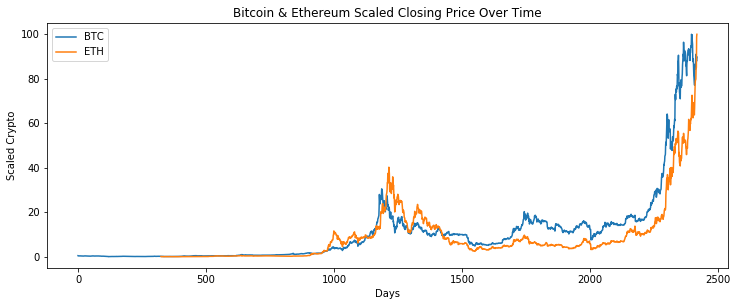

In [9]:
# Scale data and plot Closing Prices over Time of Bitcoin and Ethereum
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range= (0,100))
scaled = min_max_scaler.fit_transform(df_combined)
df_combined_scaled = pd.DataFrame(scaled, columns=df_combined.columns)

crypto = df_combined_scaled
plt.figure(figsize = (12.2, 4.5))
for  c in crypto.columns.values:
    plt.plot(crypto[c], label = c)
    
plt.title('Bitcoin & Ethereum Scaled Closing Price Over Time')
plt.xlabel('Days')
plt.ylabel('Scaled Crypto')
plt.legend(crypto.columns.values, loc = 'upper left')
plt.show()

We can observe a pattern between BTC and ETH as ETH seems to always follow BTC's lead throughout time so far. We can showcase "correlations" between multiple coins through heatmaps but this will be skipped in this notebook as there are many other projects attempting to find them. Something good to know and notice is that until now, Bitcoin has been less volatile and has given better returns compared to all other coins according to the available data history.

## Backtesting Technical Analysis Using Ichimoku:


### Why Ichimoku?

There are multiple TA methods such as the Relative Strength Index (RSI), Simple Moving Average (SMA), On-Balance Volume (OBV), etc... However, we will focus on Ichimoku here as it provides support/resistance levels that can be projected into the future. This sets the Ichimoku Cloud apart from many other technical indicators that only provide support and resistance levels for the current date and time. It's important to look at the bigger trends to see how the smaller trends fit within them. For example, during a very strong downtrend, the price may push into the cloud or slightly above it, temporarily, before falling again. Only focusing on the indicator would mean missing the bigger picture that the price was under strong longer-term selling pressure. Some traders also like to use the RSI or other tools to confirm their momentum theories. Let us not forget that one indicator is not better than another, they just provide information in different ways. I hope this notebook will shed light and new ideas to the reader. 

### Ichimoku Basics:

A few bullet points explaining basics of the Ichimoku Cloud are given below: 

- The Ichimoku Cloud is a collection of technical indicators that show support and resistance levels, as well as momentum and trend direction. It does this by taking multiple averages and plotting them on the chart. It also uses these figures to compute a "cloud" which attempts to forecast where the price may find support or resistance in the future. 
- The Ichimoku Cloud is composed of five lines or calculations, two of which compose a cloud where the difference between the two lines is shaded in.
- The lines include a nine-period average, 26-period average, an average of those two averages, a 52-period average, and a lagging closing price line.
- The Cloud is a key part of the indicator. When price is below the cloud the trend is down. When price is above the cloud the trend is up. When price is in the cloud it is trendless or transitioning.
- The above trend signals are strengthened if the Cloud is moving in the same direction as price. For example, during an uptrend the top of the Cloud is moving up, or during a downtrend the bottom of the cloud is moving down.

#### Mentioned five lines are as follows:
- *_Kijun-sen (The base line):_* A confirmation line that can act as a trailing stop line. Kijun-sen and Tenkan-sen lines can be used as Resistance, Support, Confirmation of a Trend, Buy Signal or Sell Signal. Tenkan-Sen > Kijun-Sen is a bullish cross. Kijun-Sen > Tenkan-Sen is a bearish cross.


- *_Tenkan-sen (The conversion line):_* A signal line that can also act as a minor graphical line. The default settings state that this line will be created by taking that calculation and stretching it out across the previous 9 periods. It is a different form of average. __Note:__ It is called a lagging indicator because the information that it gives is based on previous information. Lagging indicators are primarily used for confirmation signals. Conversely, leading indicators are used to predict future price action. An example of a leading indicator would be the Relative Strength Index (RSI). In a downtrend, when the price is below the cloud, traders may short-sell when the Tenkan-Sen crosses below the Kijun-Sen. They may cover the short position when the Tenkan-Sen crosses back above the Kijun-Sen.


- *_Chikou-span (The lagging line):_* A 26-period lagged line of the actual price. Mainly used for confirmation. In a situation that’s as volatile as cryptocurrency is, it’s hard to imagine that any lagging and displaced indicators will confer tremendous value to the one using it, but it is still worth consideration.


- *_Ichimoku cloud:_* This is the core of the system and it is a combination of two lines that will form a future support or resistance zone. The lines are called Senkou span A and Senkou span B. The edges of the cloud indicate support and resistance points, and the thickness of the cloud indicates price volatility. When the cloud is green, that means that the Ichimoku is signaling to you that previous price movement over the periods that it has been slated to track, are indicating that it predicts positive price movement. Conversely, when the cloud is red, that means that the Ichimoku is signaling to you that the previous price movement over the periods that it has been slated to track, are indicating that it predicts negative price movement. If the price is within the cloud, then consider that cloud to be a potential trading range that the price may move within while in there. If the price crosses above the cloud, then that is very bullish. If the price crosses below the cloud, then that is very bearish. If the price is above the cloud, then the cloud will (should but not guaranteed) serve as support. If the price is below the cloud, then the cloud will (should but not guaranteed) serve as resistance.

#### Standard Calculations for Each Line:

Conversion Line (tenkan-sen) = (9-PH+9-PL)/2

Base Line (kijun-sen) = (26-PH + 26-PL)/2

Leading Span A (senkou span A) = (CL + Base Line)/2

Leading Span B (senkou span B) = (52-PH + 52-PL)/2

Lagging Span (chikou-span) = Close plotted 26 periods in the past

Where:
PH = Period high |
PL = Period low |
CL = Conversion line



It is worth mentioning that the Ichimoku Strategy was able to foretell the huge price decline in December 2017 before the blow by using its default settings. The reader might want to check Investopedia for further explanations. Let's follow up by implementing it now. I have put two different plotting options: one that uses Matplotlib and another which uses Plotly for the user to interact with. Both turn out to be useful as the Plotly graph cannot display the correct color of the cloud.

In [10]:
# Calculate Ichimoku components:

# Bringing Back Previous BTC/USD 
df = yf.download('BTC-USD', period='max', progress=False)
df.reset_index(drop=False, inplace=True)

# Tenkan-Sen
high_9 = df['High'].rolling(window= 9).max()
low_9 = df['Low'].rolling(window= 9).min()
df['tenkan_sen'] = (high_9 + low_9) /2

# Kijun-Sen
high_26 = df['High'].rolling(window= 26).max()
low_26 = df['Low'].rolling(window= 26).min()
df['kijun_sen'] = (high_26 + low_26) /2

# this is to extend the 'df' in future for 26 days
# the 'df' here is a numerical indexed df
last_index = df.iloc[-1:].index[0]
last_date = df['Date'].iloc[-1].date()
for i in range(26):
    df.loc[last_index+1 +i, 'Date'] = last_date + timedelta(days=i)

# Senkou Span A
df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

# Senkou Span B
high_52 = df['High'].rolling(window= 52).max()
low_52 = df['Low'].rolling(window= 52).min()
df['senkou_span_b'] = ((high_52 + low_52) /2).shift(26)

# Chikou Span (most charting softwares do not plot this line)
df['chikou_span'] = df['Close'].shift(-26)

# Make new dataframe with extra tail
tmp = df[['Close','senkou_span_a','senkou_span_b','kijun_sen','tenkan_sen', 'chikou_span']].tail(300)

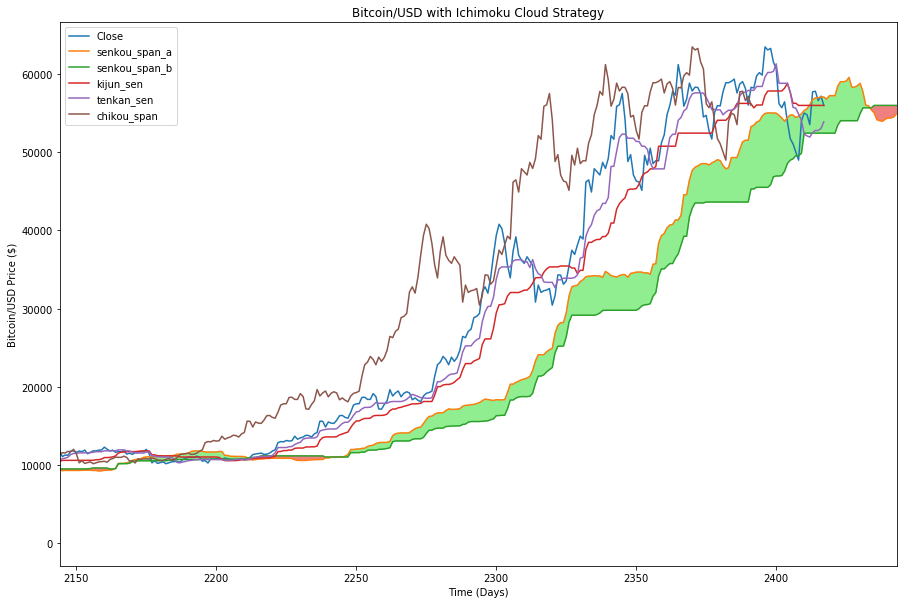

In [11]:
# Method 1 Plotting using Matplotlib:
a1 = tmp.plot(figsize=(15,10))
a1.fill_between(tmp.index, tmp.senkou_span_a, tmp.senkou_span_b)
plt.title('Bitcoin/USD with Ichimoku Cloud Strategy')
plt.xlabel('Time (Days)')
plt.ylabel('Bitcoin/USD Price ($)')
# use the fill_between call of ax object to specify where to fill the chosen color
a1.fill_between(df.index,df.senkou_span_a,df.senkou_span_b,where = df.senkou_span_a >= df.senkou_span_b, color = 'lightgreen')
a1.fill_between(df.index,df.senkou_span_a,df.senkou_span_b,where = df.senkou_span_a < df.senkou_span_b, color = 'lightcoral')


### Graph I Comments:

The graph is good to glimpse at but unfortunately, it has far too many cons: it does not show BTC as candlesticks. We could modify the code by using "from mpl_finance import candlestick_ohlc" library to showcase BTC/USD nicely. Another downside is that the graph looks very condensed. The time axis is not shown by the actual date but by days passed. The graph does not allow the user to interact with the details of the graph, which is a big bummer in my opinion. Let us see Method 2 using Plotly to get around this problem.

In [12]:
# Method 2 Plotting using Plotly:

df= df.tail(300)

fig = go.Figure(data=[go.Candlestick(name="BTC-USD",x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.add_scatter(x=df['Date'], y=df['tenkan_sen'], name="Tenkan-sen", mode='lines')
fig.add_scatter(x=df['Date'], y=df['kijun_sen'],name="Kijun-sen", mode='lines')
fig.add_scatter(x=df['Date'], y=df['chikou_span'], name="Chikou-sen", mode='lines')
fig.add_scatter(x=df['Date'], y=df['senkou_span_a'], name="Senkou Span A", mode='lines')
fig.add_scatter(x=df['Date'], y=df['senkou_span_b'], fill='tonexty',name="Senkou Span B", mode='lines')

fig.layout.update(
    title='Interactive Bitcoin/USD Daily Chart with Ichimoku Cloud Strategy',
    xaxis_title='Date',
    yaxis_title='Bitcoin/USD Price ($)'
)


fig.show()

### Graph II Comments:

The Plotly graph is much nicer as the user can interact with all the data within the graph, i.e. select which lines he/she wants to observe (just by pressing on the legend to hide/unhide a line, double press to isolate one line) and zoom in by either using the rangeslider or click and drag on the graph. The only tough part was finding how to correctly plot the color of the cloud (there doesn't seem to be a solution for it within the Plotly library). This is where the Matplotlib graph from Method 1 comes out to be useful! The user can easily understand which cloud is green and which is red as it was explained previously and also again below.

Let us look back at the basics of Ichimoku. First, the trend is up when prices are above the cloud. Second, the uptrend is strengthened when the Senkou Span A (green cloud line) is rising and above the Senkou Span B (red cloud line). Because the cloud is shifted forward 26 days, it also provides a glimpse of future support or resistance. Signals that are counter to the existing trend are deemed weaker, such as short-term bullish signals within a long-term downtrend or short-term bearish signals within a long-term uptrend. When the Tenkan-sen crosses up through the Kijun-sen, that is considered a bullish signal and vice versa when the Tenkan-sen crosses down through the Kijun-sen that is considered a bearish signal. With regards to the price and the Tenkan-sen, when prices cross up through the Tenkan-sen that is considered a bullish signal, and again vice versa when prices cross down through the Tenkan-sen that is considered a bearish signal.

### Summary When to Buy or Sell:

*__Buy when the following are true:__*

1) Prices are above the cloud 

AND 

2) Senkou Span A is above Senkou Span B 

AND __EITHER__ 3) the Tenkan-sen crosses up through the Kijun-sen __OR__ 4) prices cross up through the Tenkan-sen

When either of these last two bullish criteria are met, you should __BUY__ and exit as soon as the Tenkan-sen crosses down through the Kijun-sen.

*__Sell when the following are true:__*

1) Prices are below the cloud 

AND
2) Senkou Span A is below Senkou Span B

AND __EITHER__ 3) the Tenkan-sen crosses down through the Kijun-sen __OR__ 4) prices cross down through the Tenkan-sen

When either of these last two bearish criteria are met, you should __SELL__ and exit as soon as the Tenkan-sen crosses up through the Kijun-sen.


## Conclusion:

In this project, we could see how simple it is to find financial data, learn and apply the Ichimoku strategy on Python. There are a few limitations to the Ichimoku strategy. It can be hard to process so much information when looking at so many data lines on one graph. Another limitation of the Ichimoku Cloud is that it is based on historical data. While two of these data points are plotted in the future, there is nothing in the formula that is inherently predictive. Averages are simply being plotted in the future. The cloud can also become irrelevant for long periods of time, as the price remains way above or below it. At times like these, the conversion line, base line, and their crossovers become more important, as they generally stick closer to the price. 

I personally think that this strategy is interesting to keep in mind and hope once again that this notebook has been full of useful information for the reader. 



## Bonus:

All this backtesting aside, here is a song I wrote with my band below to cheer you up after all this reading, hope you enjoy :-)

<font color='white'>References:</font>
<font color='white'>https: //steemit.com /bitcoin/@proofofresearch/ ichimoku-cloud-explained-thoroughly-debunking-ichimoku-myths</font>
<font color='white'>https: //www. investopedia .com/terms/i/ichimoku-cloud.asp#:~:text=What%20is%20the%20Ichimoku%20Cloud,plotting%20them%20on%20the%20chart.</font>
<font color='white'>https: //medium.com/ swlh/ichimoku-kinko-hyo-the-full-guide-in-python-e7b05f076307</font>
<font color='white'>https: //pythonforfinance.net /2019/06/26/ ichimoku-trading-strategy-with-python/</font>
<font color='white'>https: //chart-studio.plotly.com/ ~h.haider1013/4/ichimoku-cloud/#/code</font>
<font color='white'>google search ichimoku cloud plotly on python</font>
<font color='white'>https:// stackoverflow.com /questions/28477222/python-pandas-calculate-ichimoku-chart-components</font>


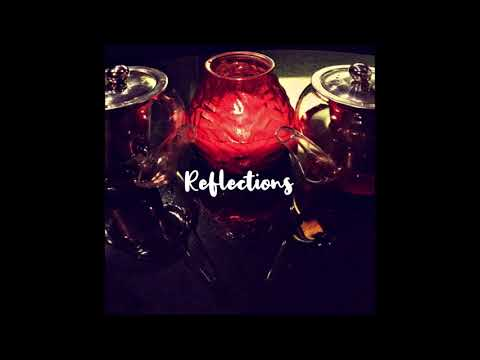

In [13]:
# Link to video: https://www.youtube.com/watch?v=C05-eYiY1aA&feature=emb_title
from IPython.display import YouTubeVideo
YouTubeVideo('C05-eYiY1aA', width = 500, height = 300)

In [14]:
# This function helps displaying plotly graphs on the HTML file
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state

# Convert into HTML file
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook Ichimoku Backtesting UPDATED MAY 4 2021.ipynb to html',
 '[NbConvertApp] Writing 973213 bytes to Ichimoku Backtesting UPDATED MAY 4 2021.html',
 '[NbConvertApp] Converting notebook Ichimoku Backtesting.ipynb to html',
 '[NbConvertApp] Writing 947012 bytes to Ichimoku Backtesting.html']